# Homework 2 Part 1

## Mohammed Oubia

## Application: SVD and PCA for Machine Learning


### Visualizing dyad.

Consider an image from skimage.data. For simplicity, say that X ∈ R
m×n is the matrix representing
that image. You are asked to visualize the dyad of the SVD Decomposition of X and the result of compressing
the image via SVD. In particular:


• Load the image into memory and compute its SVD;

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
# Load the image into memory and compute its SVD
X = skimage.data.camera()
#SVD decomposition of x
U, s, VT = np.linalg.svd(X,full_matrices=True)
n=U.shape[0]
S=np.zeros(X.shape)
S[:n,:n]=np.diag(s)
print(U.shape, s.shape, VT.shape)

(512, 512) (512,) (512, 512)


• Visualize some of the dyad σi Ui ViT
of this decomposition. What do you notice?

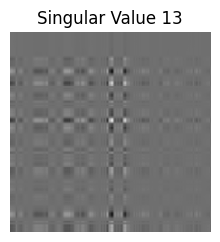

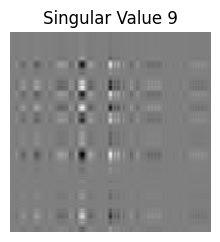

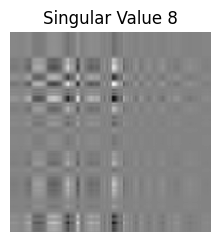

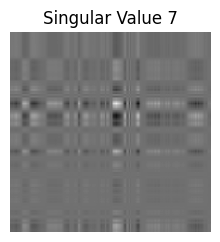

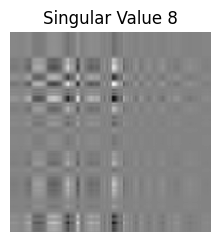

In [2]:
for i in range(5):
    # take the ith singular value and vectors
    j=np.random.randint(0,20)
    # calculation of the dyad
    A_k = U[:, j:j+1] @ S[j:j+1, j:j+1] @ VT[j:j+1, :]
    # visualize the dyad
    plt.figure(figsize=(15,15))
    plt.subplot(1, 5, i + 1,)
    plt.imshow( A_k, cmap='gray')
    plt.title(f'Singular Value {j+1}')
    plt.axis('off')
plt.show()

You can notice an increasing i of dyad lose a lot of image information.
We can observe that the first singular values are a lot bigger than the others, so the important part of the data rely only on a few dimension and not all 512


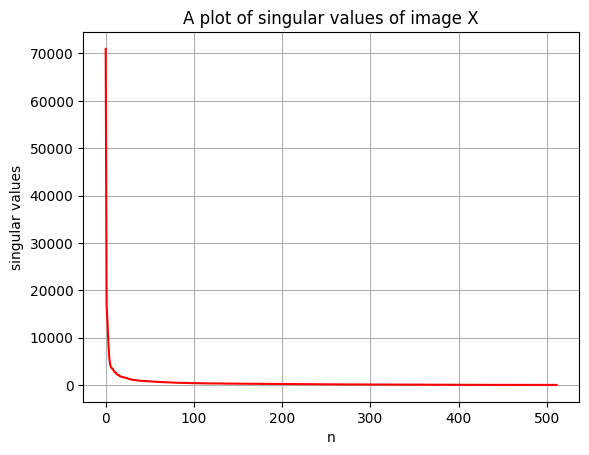

In [3]:
plt.plot(s,color="red")
plt.grid()
plt.title("A plot of singular values of image X")
plt.xlabel("n")
plt.ylabel("singular values")
plt.show();

In [4]:
def visualizeImagePerK(X,k):
    U, s, VT = np.linalg.svd(X, full_matrices=True)
    n,m=X.shape
    S = np.zeros((n,m))
    S[:n, :n] = np.diag(s)
    A_k = U[:, :k] @ S[:k, :k] @ VT[:k, :]
    plt.imshow(A_k, cmap="gray")
    plt.show()

• Plot the singular values of X. Do you note something?
• Visualize the k-rank approximation of X for different values of k. What do you observe?

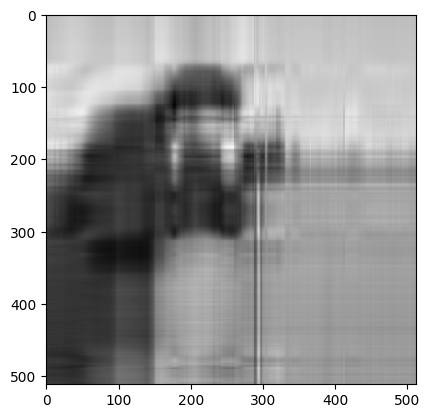

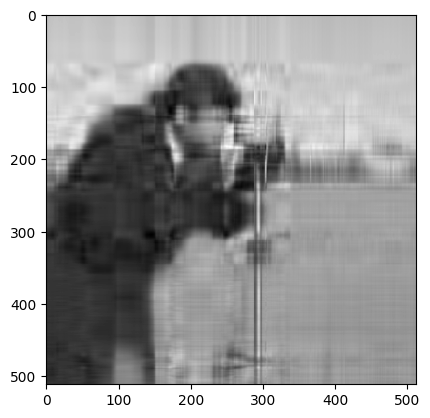

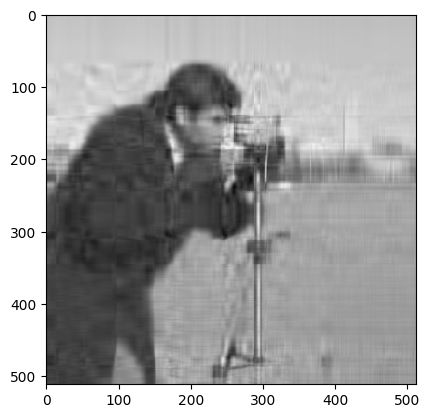

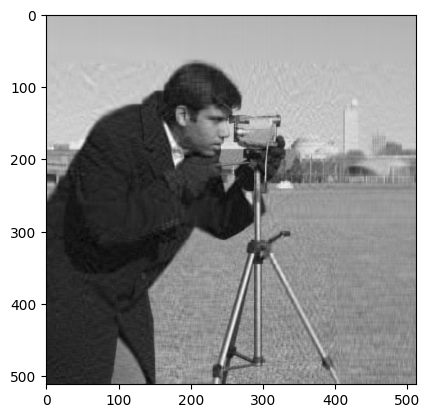

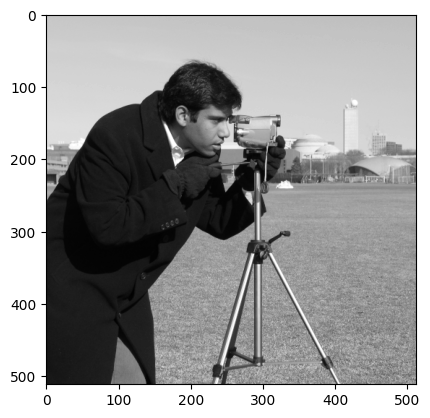

In [5]:
def visualizeImagePerK(X,k):
    #function visualize an image with k-rank aproximation 
    U, s, VT = np.linalg.svd(X, full_matrices=True)
    n,m=X.shape
    S = np.zeros((n,m))
    S[:n, :n] = np.diag(s)
    A_k = U[:, :k] @ S[:k, :k] @ VT[:k, :]
    plt.imshow(A_k, cmap="gray")
    plt.show()
plot1=visualizeImagePerK(X,5)
plot2=visualizeImagePerK(X,10)
plot3=visualizeImagePerK(X,15)
plot4=visualizeImagePerK(X,50)
plot5=visualizeImagePerK(X,512)

As we can see the image gets a lot better with k increasing, but it doesn't increase that much after a certain k.

• Compute and plot the approximation error ||X − Xk||F for increasing values of k, where Xk is the
k-rank approximation of k.

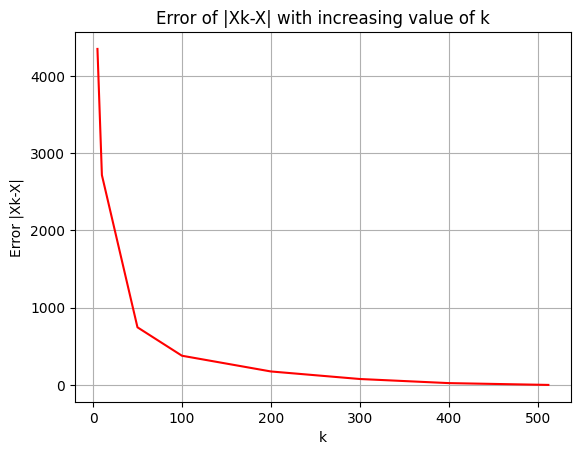

In [6]:
k=10
U, s, VT = np.linalg.svd(X, full_matrices=True)
n,m=X.shape
S = np.zeros((n,m))
S[:n, :n] = np.diag(s)
kvalues=(5,10,50,100,200,300,400,512)
error_vector=np.zeros(len(kvalues))
idx=0
for i in kvalues:
    A_k = U[:, :i] @ S[:i, :i] @ VT[:i, :]
    error_vector[idx]=np.linalg.norm(X-A_k,2)
    idx+=1
plt.plot(kvalues,error_vector, color="red")
plt.grid()
plt.xlabel("k")
plt.ylabel("Error |Xk-X|")
plt.title("Error of |Xk-X| with increasing value of k")
plt.show();

• Plot the compression factor ck = 1−
k(m+n+1)
mn
for increasing k. What is the approximation error when
the compressed image requires the same amount of informations of those of the uncompressed image
(i.e. ck = 0)?


112.86398822190459


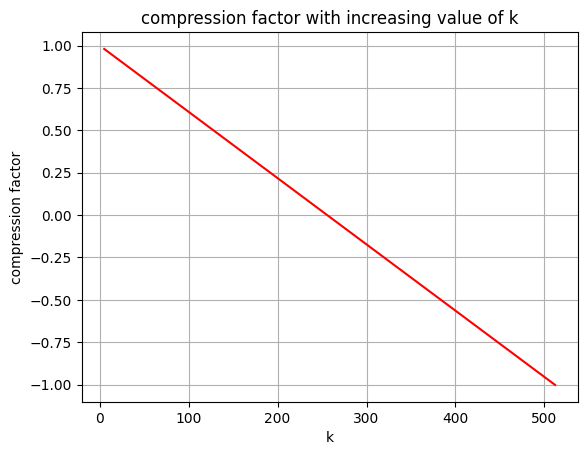

In [7]:
ck_vector=np.zeros(len(kvalues))
idx=0
for i in kvalues:
    ck_vector[idx]=1-(i*(m+n+1))/(m*n)
    idx+=1
    
plt.plot(kvalues,ck_vector, color="red")
plt.grid()
plt.xlabel("k")
plt.ylabel("compression factor")
plt.title("compression factor with increasing value of k")
plt.show
kzero=int(m*n/(m+n+1))
A_kzero = U[:, :kzero] @ S[:kzero, :kzero] @ VT[:kzero, :]
print(np.linalg.norm(X-A_kzero,2))

As we can see the compression factor go down linearly with increasing k, the 0 it reached 255, and if we take bigger k than kzero we use more space than the original image

## End